In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
crime_data= pd.read_csv('/content/drive/MyDrive/Personal/Studies/MSC Data Science Material/SEM2/ML/Practical/data_set/crime_data.csv')  
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
crime_data.isnull().any()

Unnamed: 0    False
Murder        False
Assault       False
UrbanPop      False
Rape          False
dtype: bool

In [6]:
mydata=crime_data.iloc[:,crime_data.columns!='Unnamed: 0']
inplace=True

In [7]:
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [8]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [9]:
scaler=MinMaxScaler()
norm_mydata=mydata.copy()

In [10]:
def minmaxscaler(x):
  for columnName, columnData in x.iteritems():
    x[columnName]=scaler.fit_transform(np.array(columnData).reshape(-1,1)) #Decimal method

In [11]:
minmaxscaler(norm_mydata)

<ipython-input-10-8f583cea87c9>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for columnName, columnData in x.iteritems():


In [12]:
norm_mydata

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0.5, 1.0, 'Elbow Curve to find optimum K')

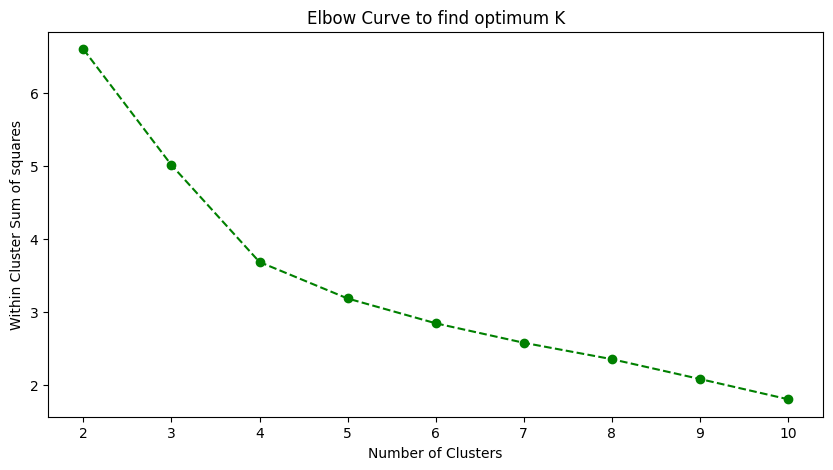

In [13]:
#Scree plot or Elbow plot to find k 

k=list(range(2,11))
sum_of_squared_distances = []

for i in k:
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(norm_mydata)
  sum_of_squared_distances.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(k, sum_of_squared_distances, 'go--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of squares')
plt.title('Elbow Curve to find optimum K')


In [14]:
#Now building kmeans model with k=4 

#Instantiating
kmeans4=KMeans(n_clusters=4)

#Training the model
kmeans4.fit(norm_mydata)

#predicting
y_pred=kmeans4.fit_predict(norm_mydata)
print(y_pred)

#Storing the y_pred values in a new column
crime_data['Cluster']=y_pred+1 #to start the cluster number from 1

[1 2 2 1 2 2 0 0 2 1 0 3 2 0 3 0 3 1 3 2 0 2 3 1 0 3 3 2 3 0 2 2 1 3 0 0 0
 0 0 1 3 1 2 0 3 0 0 3 3 0]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
#Storing the centroids to a dataframe 

centroids=kmeans4.cluster_centers_
centroids=pd.DataFrame(centroids, columns=['Murder','Assault','UrbanPop','Rape'])
centroids.index=np.arange(1,len(centroids)+1) #Start the index from 1
centroids

,Murder,Assault,UrbanPop,Rape
1,0.304394,0.329371,0.705882,0.310990
2,0.791416,0.680223,0.368644,0.364664
3,0.612450,0.750000,0.754237,0.679802
4,0.168675,0.114858,0.340287,0.126019


<Axes: xlabel='Murder', ylabel='Assault'>

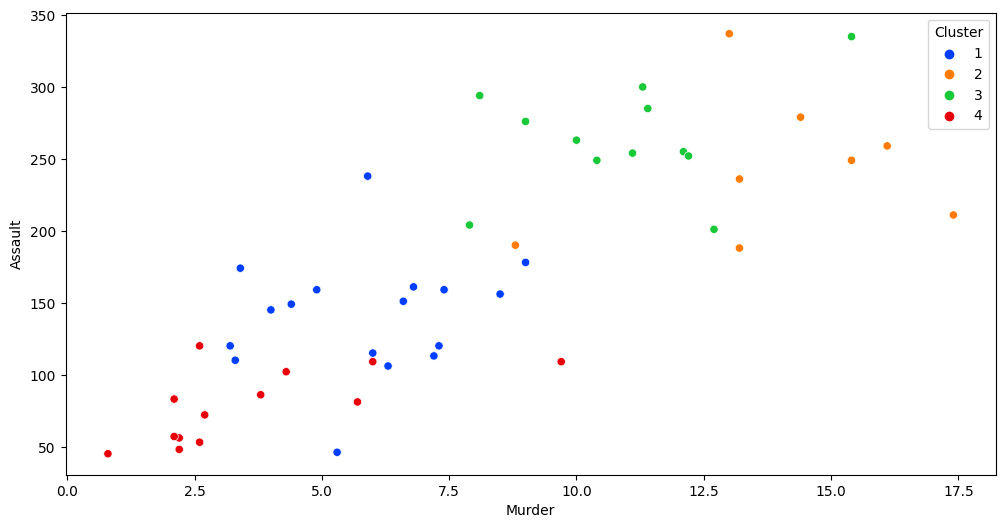

In [16]:
#Sample visualization of clusters 
#Lets just take any two of the features and plot to see how the observations are clustered 

import seaborn as sns 
plt.figure(figsize=(12,6))
sns.set_palette("pastel")
sns.scatterplot(x=crime_data['Murder'], y=crime_data['Assault'], hue=crime_data['Cluster'], palette='bright')

<Axes: xlabel='Rape', ylabel='UrbanPop'>

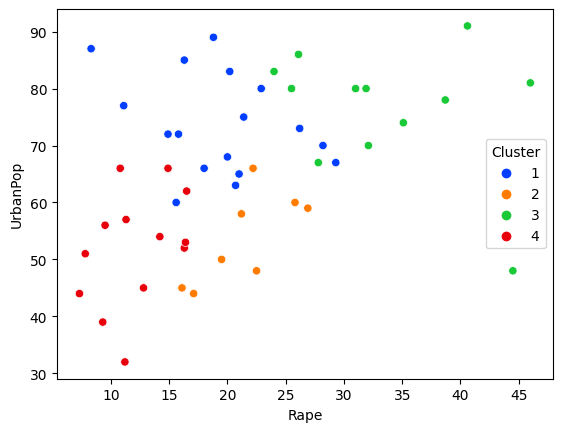

In [17]:
sns.scatterplot(x=crime_data['Rape'], y=crime_data['UrbanPop'], hue=crime_data['Cluster'], palette='bright')